c:\Users\aditk\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5005 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4976 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4943 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.4938 - v

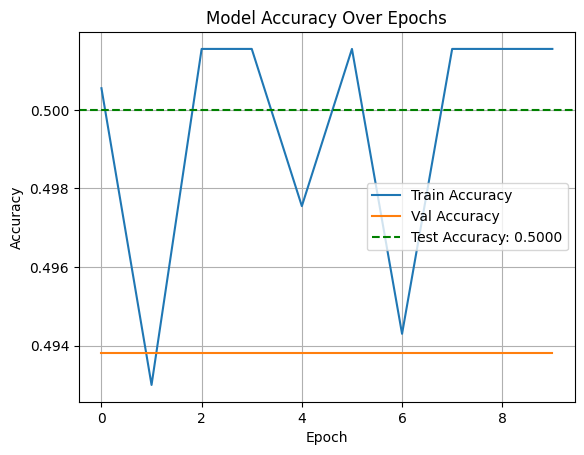

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
    return results
# Vectorixw Training Dara
X_train =vectorize_sequences(train_data)

# Vectorize Testing Data
X_test=vectorize_sequences(test_data)

X_train[0]


X_train.shape


y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

model=Sequential([
    Dense(16,activation='relu',input_shape=(10000,)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=512,
                  validation_split=0.2,)


# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
